In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import datetime
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
plt.style.use('fivethirtyeight')

In [3]:
%time data=pd.read_csv('data.csv')
data.head()


Wall time: 621 ms


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [80]:
pd.set_option('max_columns',100)
data.head(20)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",2021,5'7,159.0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,29,89,71,87,91,74,94,88
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",2022,6'2,183.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,27,88,73,81,91,83,94,88
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",2022,5'9,150.0,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,28,85,72,80,94,69,92,84
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,6'4,168.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,16,26,43,39,66,54,92,21
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",2023,5'11,154.0,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,59,79,81,92,81,76,92,85
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,93000000.0,340000.0,2142,Right,4.0,4.0,4

In [6]:
#description of data for numerical column

pd.set_option('max_columns',100)
data.iloc[:,2:].describe().style.background_gradient(cmap='Blues')

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
#description of data for categorical column
data.iloc[:,13:].describe(include='object')

,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


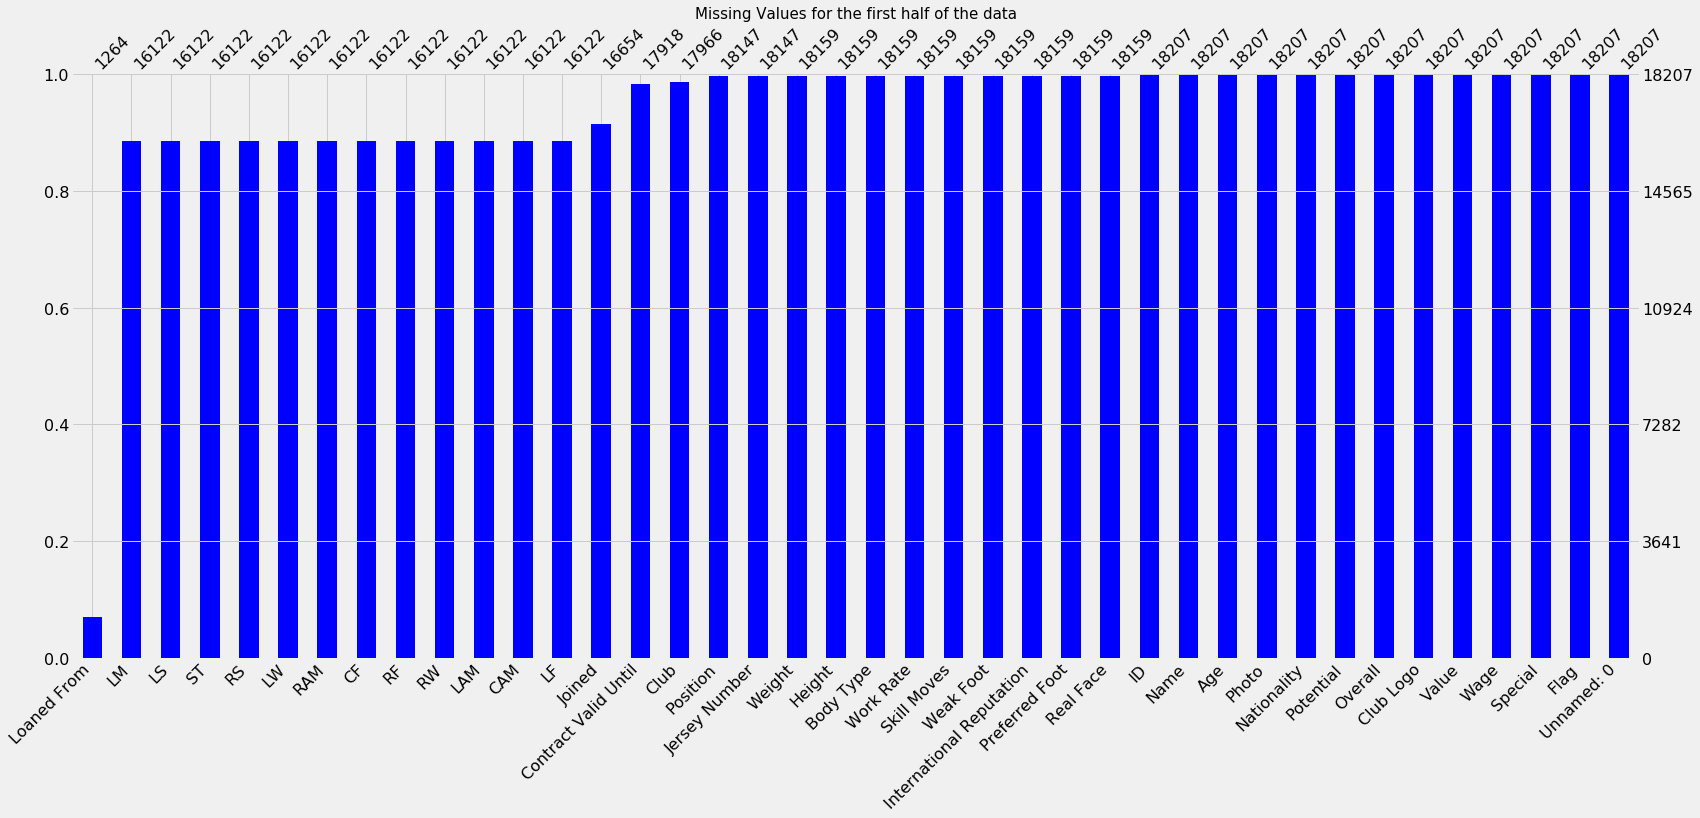

In [8]:
#visualization of missing values as a matrix

mno.bar(data.iloc[:,:40], color='blue',sort='ascending')
plt.title('Missing Values for the first half of the data', fontsize='15')
plt.show()

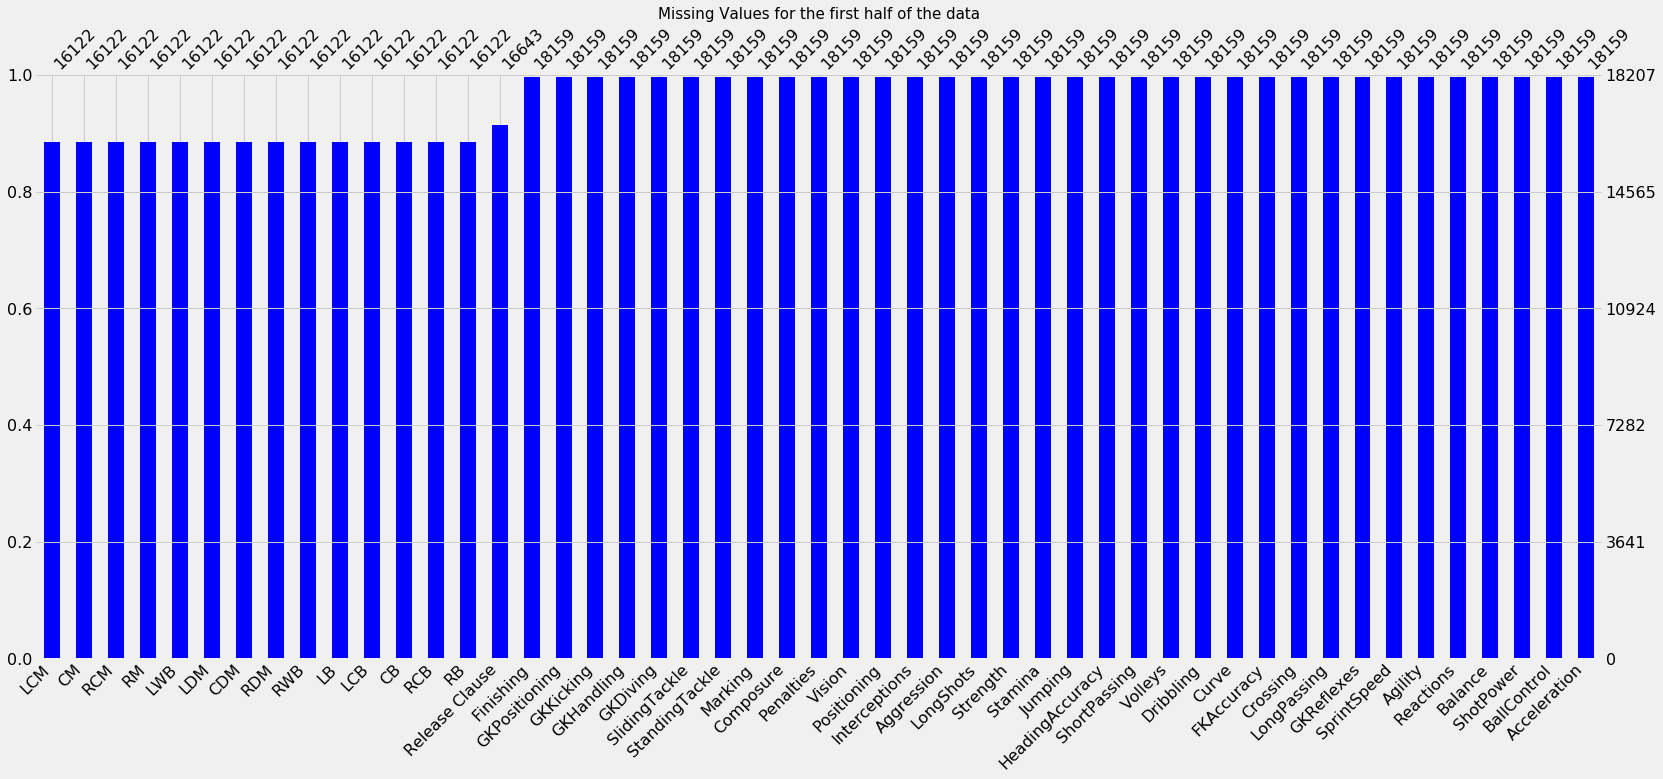

In [9]:
mno.bar(data.iloc[:,40:], color='blue',sort='ascending')
plt.title('Missing Values for the first half of the data', fontsize='15')
plt.show()

In [10]:
data.drop('Loaned From',
  axis='columns', inplace=True)

In [11]:
data['Work Rate'].fillna(data['Work Rate'].mode()[0],inplace=True)
data['Real Face'].fillna(data['Real Face'].mode()[0],inplace=True)
data['Position'].fillna(data['Position'].mode()[0],inplace=True)
data['Joined'].fillna(data['Joined'].mode()[0],inplace=True)
data['Contract Valid Until'].fillna(data['Contract Valid Until'].mode()[0],inplace=True)
data['Height'].fillna(data['Height'].mode()[0],inplace=True)
data['Weight'].fillna(data['Weight'].mode()[0],inplace=True)
data['Club'].fillna(data['Club'].mode()[0],inplace=True)
data['International Reputation'].fillna(1,inplace=True)
data['Skill Moves'].fillna(2,inplace=True)
data['Weak Foot'].fillna(3,inplace=True)
data['Jersey Number'].fillna(8,inplace=True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace=True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace=True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace=True)
data['Acceleration'].fillna(data['Acceleration'].mean(), inplace=True)
data['SprintSpeed'].fillna(data['SprintSpeed'].mean(), inplace=True)
data['Agility'].fillna(data['Agility'].mean(), inplace=True)
data['Reactions'].fillna(data['Reactions'].mean(), inplace=True)
data['Balance'].fillna(data['Balance'].mean(), inplace=True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace=True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace=True)
data['Curve'].fillna(data['Curve'].mean(), inplace=True)
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(), inplace=True)
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace=True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace=True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace=True)
data['Body Type'].fillna(data['Body Type'].mode()[0],inplace=True)
data['Preferred Foot'].fillna(data['Preferred Foot'].mode()[0], inplace=True)
data.fillna(0,inplace=True)
data.isnull().sum()

Unnamed: 0        0
ID                0
Name              0
Age               0
Photo             0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 88, dtype: int64

In [12]:
#creating new features by aggregrating 
def rating(data):
    return int(round((data[['Potential','Overall']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy','Dribbling','Curve','BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression','Interceptions','Positioning','Vision','Composure']].mean()).mean()))

def defending(data):
    return int(round((data[['Marking','StandingTackle','SlidingTackle']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing','ShortPassing','LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration','SprintSpeed','Agility','Reactions']].mean()).mean()))

def power(data):
    return int(round((data[['Balance','Jumping','Stamina','Strength']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing','Volleys','FKAccuracy','ShotPower','LongShots','Penalties']].mean()).mean()))


In [13]:
#adding new categories to data
data['Defending']=data.apply(defending,axis=1)
data['General']=data.apply(general,axis=1)
data['Mental']=data.apply(mental,axis=1)
data['Passing']=data.apply(passing,axis=1)
data['Mobility']=data.apply(mobility,axis=1)
data['Power']=data.apply(power,axis=1)
data['Rating']=data.apply(rating,axis=1)
data['Shooting']=data.apply(shooting,axis=1)

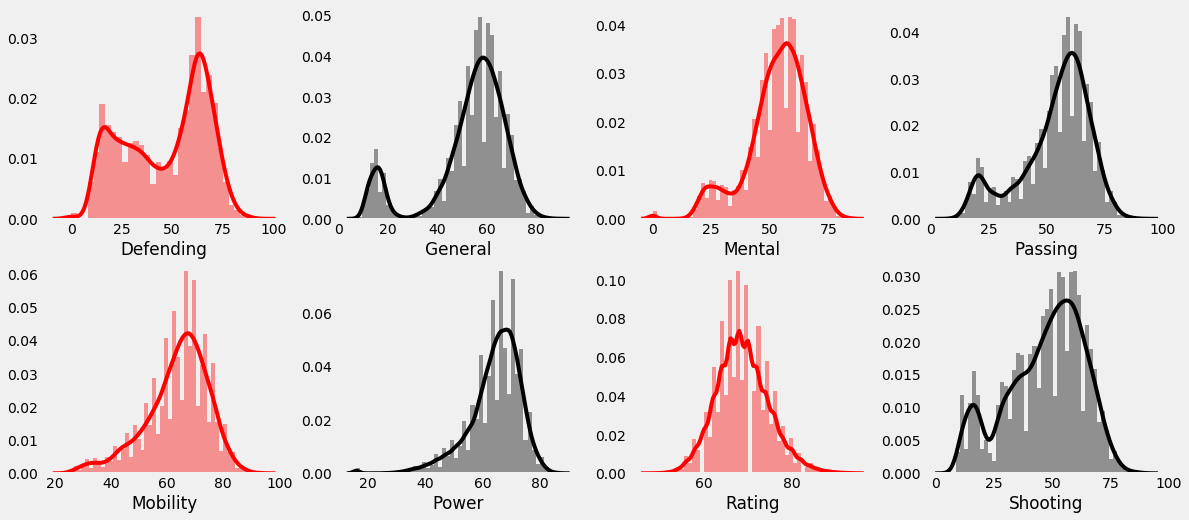

In [14]:
#Destribution of scores of Different skills 
plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,4,1)
sns.distplot(data['Defending'],color='red')
plt.grid()

plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,4,2)
sns.distplot(data['General'],color='black')
plt.grid()

plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,4,3)
sns.distplot(data['Mental'],color='red')
plt.grid()

plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,4,4)
sns.distplot(data['Passing'],color='black')
plt.grid()

plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,4,5)
sns.distplot(data['Mobility'],color='red')
plt.grid()

plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,4,6)
sns.distplot(data['Power'],color='black')
plt.grid()

plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,4,7)
sns.distplot(data['Rating'],color='red')
plt.grid()

plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,4,8)
sns.distplot(data['Shooting'],color='black')
plt.grid()




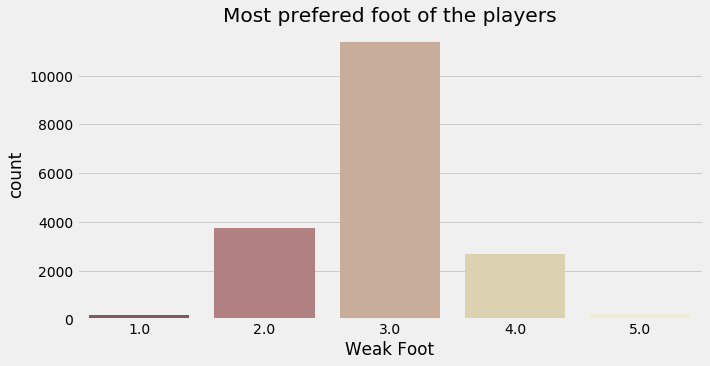

In [15]:
#comparing prefered foot
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(data['Weak Foot'], palette='pink')
plt.title('Most prefered foot of the players')
plt.show()

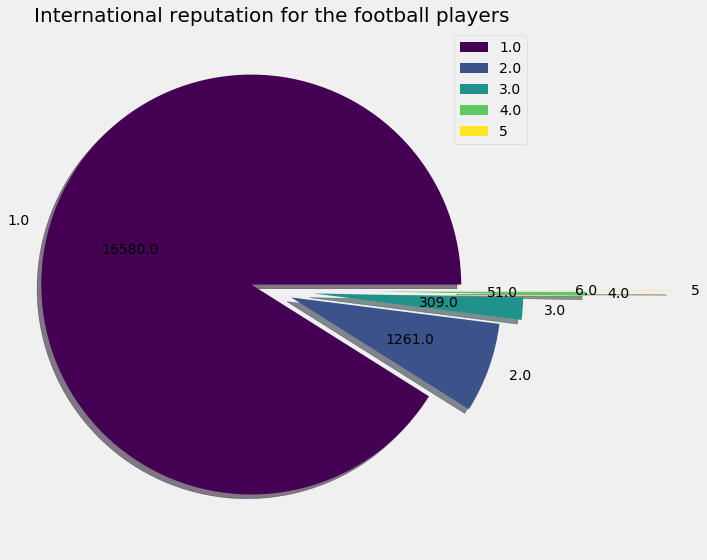

In [16]:
#pie chart to represent share of international reputation

labels=['1.0','2.0','3.0','4.0','5']
sizes=data['International Reputation'].value_counts()
colors=plt.cm.viridis(np.linspace(0,1,5))
explode=[0.1,0.1,0.2,0.5,0.9]


def absolute_value(val):
    a=np.round(val/100.*sizes.sum(),0)
    return a
plt.rcParams['figure.figsize']=(9,9)
plt.pie(sizes,labels=labels, colors=colors, autopct = absolute_value, explode=explode, shadow=True)
plt.title('International reputation for the football players', fontsize=20)
plt.legend()
plt.show()

In [17]:
data[data['International Reputation']==5][['Name','Nationality','Overall','Weak Foot','Preferred Foot']].sort_values(by='Overall',ascending=False).style.background_gradient(cmap='copper')

,Name,Nationality,Overall,Weak Foot,Preferred Foot
0,L. Messi,Argentina,94,4.000000,Left
1,Cristiano Ronaldo,Portugal,94,4.000000,Right
2,Neymar Jr,Brazil,92,5.000000,Right
7,L. Suárez,Uruguay,91,4.000000,Right
22,M. Neuer,Germany,89,4.000000,Right
109,Z. Ibrahimović,Sweden,85,4.000000,Right


In [18]:
data['Weak Foot'].unique()[4]

1.0

In [19]:
val = []
freq = []
f=[]
for i in data['Weak Foot'].unique():
    val.append(i)
    a = (data['Weak Foot']==i).value_counts()
    freq.append(a)
for i in range (len(freq)):
    f.append(freq[i][True])
val

[4.0, 5.0, 3.0, 2.0, 1.0]

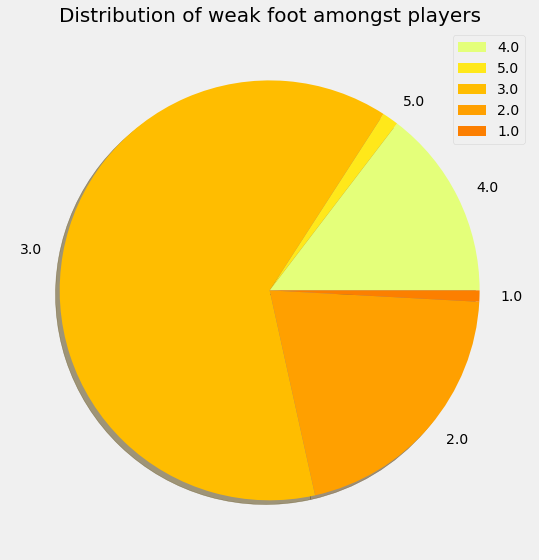

In [20]:
# labels=['1.0','2.0','3.0','4.0','5.0']
# sizes=data['Weak Foot'].value_counts()
colors=plt.cm.Wistia(np.linspace(0,1,5))

val = []
freq = []
f=[]
for i in data['Weak Foot'].unique():
    val.append(i)
    a = (data['Weak Foot']==i).value_counts()
    freq.append(a)
for i in range (len(freq)):
    f.append(freq[i][True])

def absolute_value(val):
    a=np.round(val/100.*sizes.sum(),0)
    return a
# labels=values,
plt.rcParams['figure.figsize']=(9,9)
plt.pie(f, labels = val, colors=colors, shadow=True)
plt.title('Distribution of weak foot amongst players', fontsize=20)
plt.legend()
plt.show()

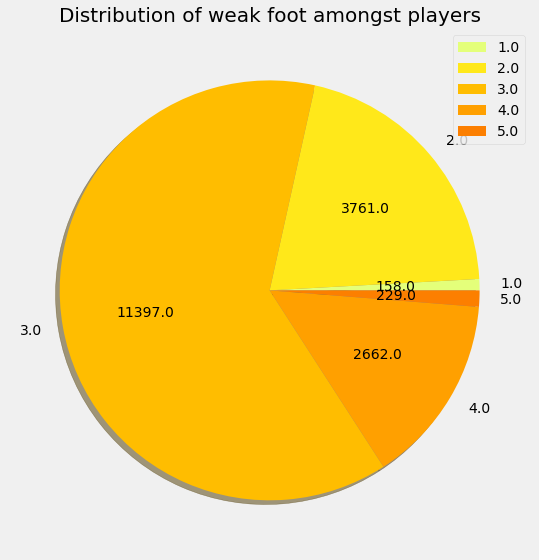

In [21]:
labels=[1.0,2.0,3.0,4.0,5.0]
sizes=data['Weak Foot'].value_counts().reindex(labels)
colors=plt.cm.Wistia(np.linspace(0,1,5))



# labels=values,
plt.rcParams['figure.figsize']=(9,9)
plt.pie(sizes, labels = labels, autopct = absolute_value, colors=colors, shadow=True)
plt.title('Distribution of weak foot amongst players', fontsize=20)
plt.legend()
plt.show()

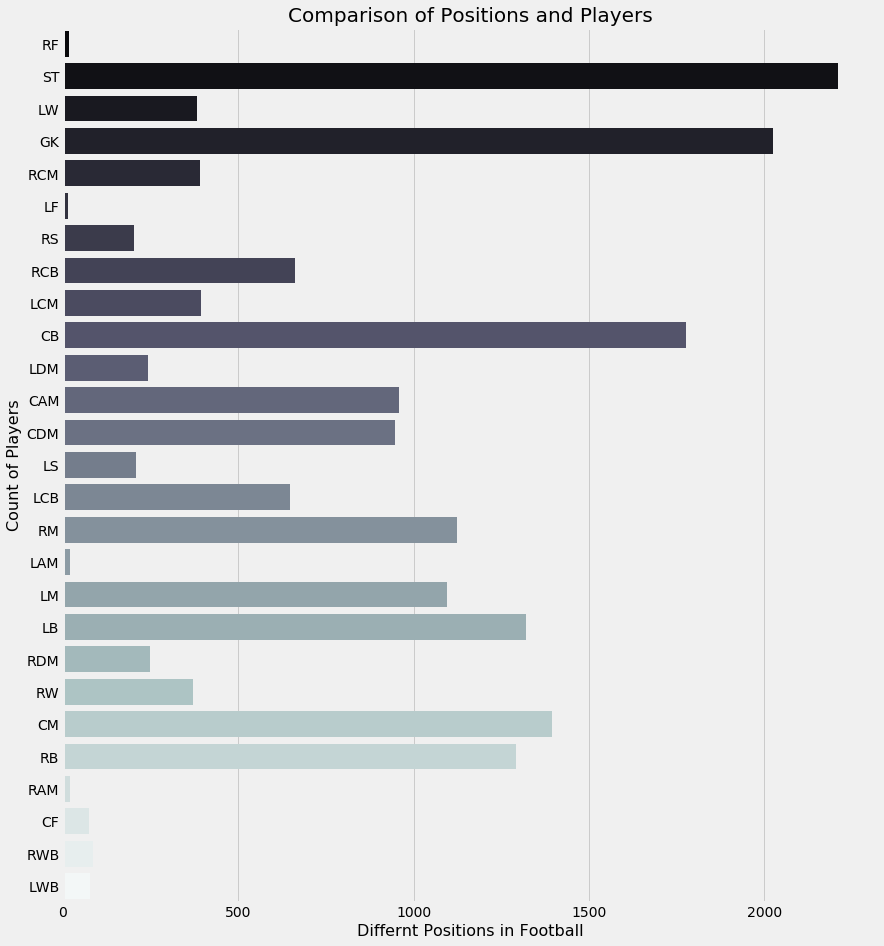

In [22]:
 #Different positions acquired by the players
    
plt.figure(figsize=(13,15))
plt.style.use('fivethirtyeight')
ax=sns.countplot(y='Position',data=data, palette='bone')
ax.set_xlabel(xlabel='Differnt Positions in Football', fontsize=16)
ax.set_ylabel(ylabel='Count of Players', fontsize=16)
ax.set_title(label='Comparison of Positions and Players', fontsize=20)
plt.show()

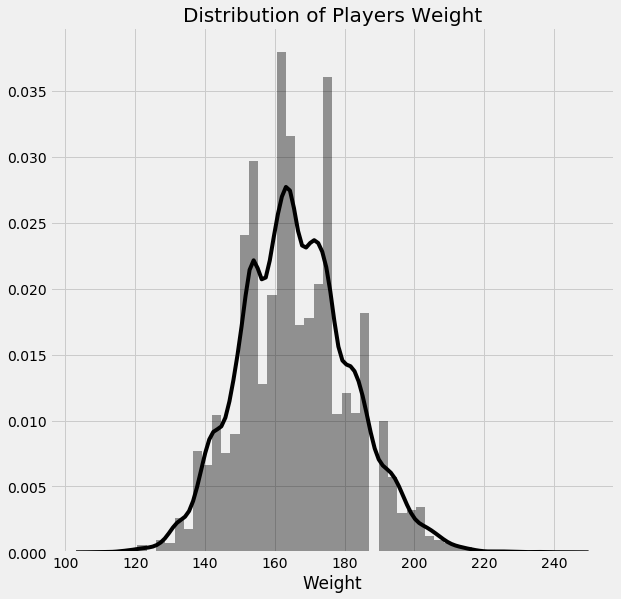

In [23]:
def extract_value_from(value):
    out=value.replace('lbs','')
    return float(out)

data['Weight']=data['Weight'].apply(lambda x: extract_value_from(x))

sns.distplot(data['Weight'], color='black')
plt.title('Distribution of Players Weight', fontsize=20)
plt.show()

In [24]:
def extract_value_from(value):
    out=value.replace('€','')
    if 'M' in out:
        out=float(out.replace('M',''))*1000000
    elif 'K' in out:
        out=float(out.replace('K',''))*1000
    return float(out)
        

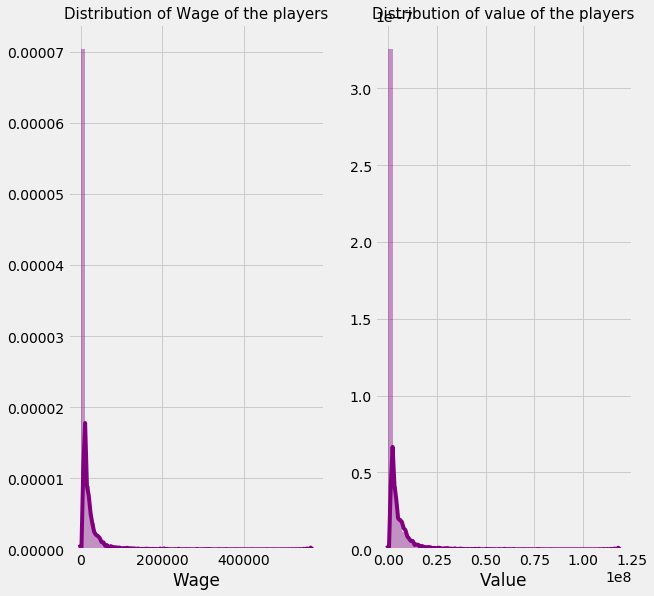

In [25]:
data['Wage']=data['Wage'].apply(lambda x: extract_value_from(x))
data['Value']=data['Value'].apply(lambda x: extract_value_from(x))

plt.subplot(1,2,1)
sns.distplot(data['Wage'], color='purple')
plt.title('Distribution of Wage of the players', fontsize=15)

plt.subplot(1,2,2)
sns.distplot(data['Value'], color='purple')
plt.title('Distribution of value of the players', fontsize=15)

plt.show()

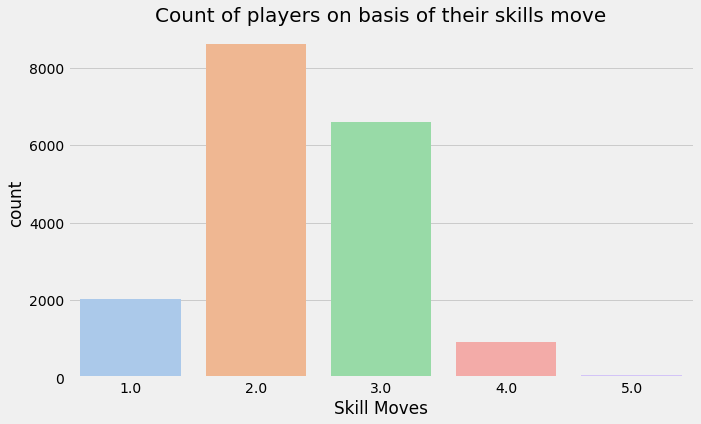

In [29]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Skill Moves', data=data, palette='pastel')
ax.set_title('Count of players on basis of their skills move', fontsize=20)
plt.show()

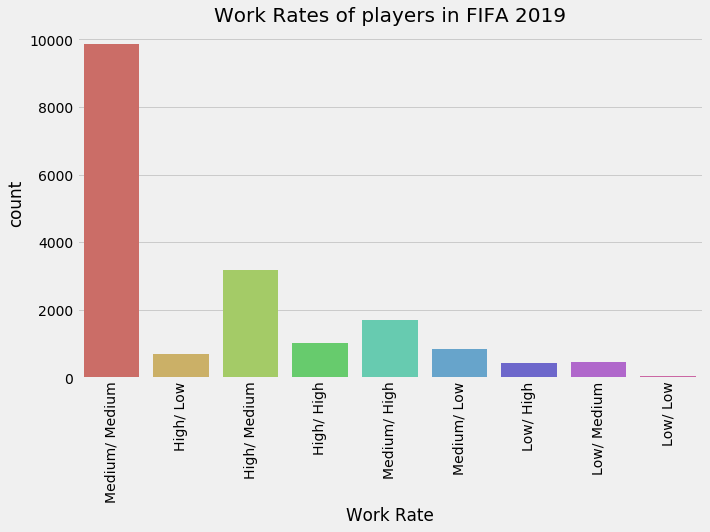

In [34]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax=sns.countplot(x='Work Rate', data=data, palette='hls')
ax.set_title('Work Rates of players in FIFA 2019', fontsize=20)
plt.xticks(rotation=90)
plt.show()

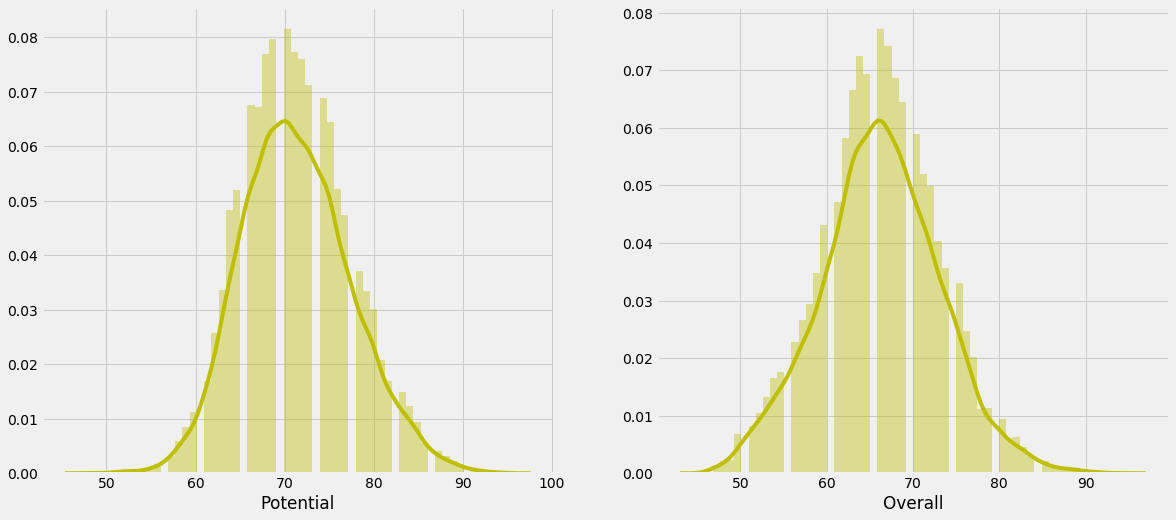

In [37]:
plt.rcParams['figure.figsize']=(18,8)
plt.subplot(1,2,1)
sns.distplot(data['Potential'],bins=58,color='y')

plt.rcParams['figure.figsize']=(18,8)
plt.subplot(1,2,2)
sns.distplot(data['Overall'],bins=58,color='y')
plt.show()

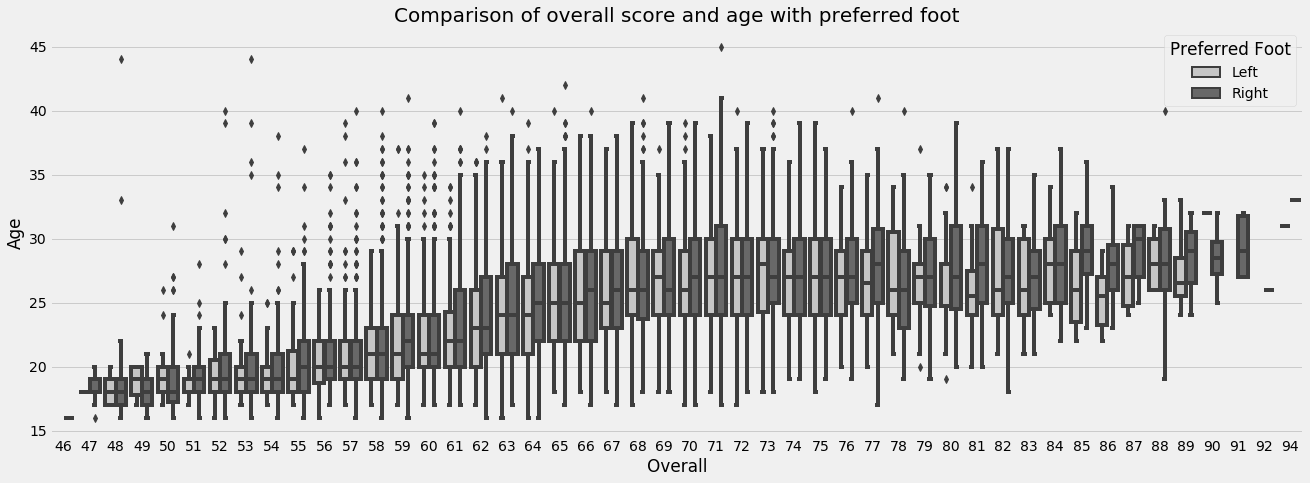

In [39]:
plt.rcParams['figure.figsize']=(20,7)
plt.style.use('seaborn-dark-palette')

sns.boxplot(data['Overall'],data['Age'],hue=data['Preferred Foot'], palette='Greys')
plt.title('Comparison of overall score and age with preferred foot', fontsize=20)
plt.show()

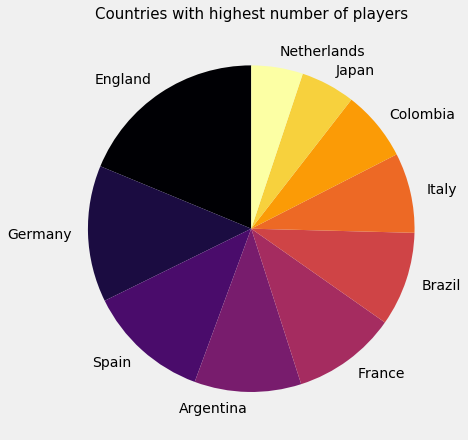

In [43]:
data['Nationality'].value_counts().head(10).plot(kind='pie',cmap='inferno',startangle=90)
plt.title('Countries with highest number of players', fontsize=15)
plt.axis('off')
plt.show()

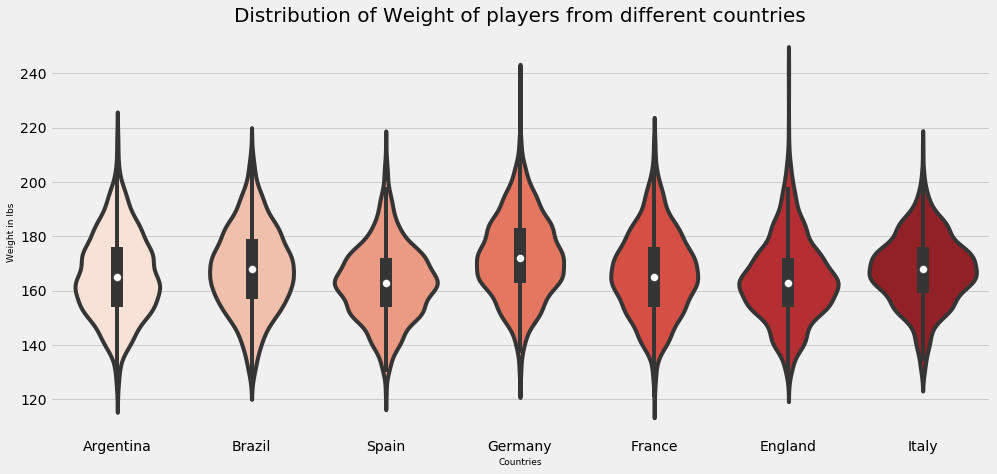

In [44]:

some_countries=('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia')
data_countries=data.loc[data['Nationality'].isin(some_countries)&data['Weight']]

plt.rcParams['figure.figsize']=(15,7)
ax=sns.violinplot(x=data_countries['Nationality'], y=data_countries['Weight'], palette='Reds')
ax.set_xlabel(xlabel='Countries', fontsize=9)
ax.set_ylabel(ylabel='Weight in lbs',fontsize=9)
ax.set_title(label='Distribution of Weight of players from different countries', fontsize=20)
plt.show()


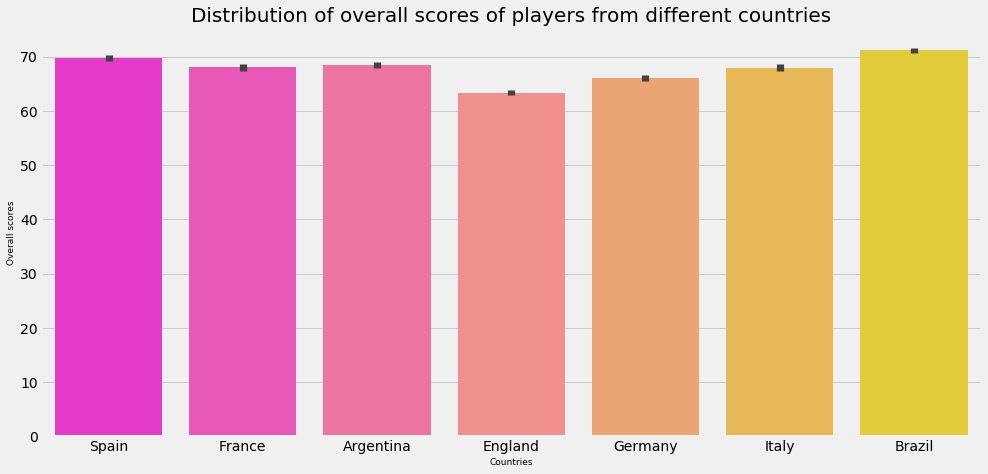

In [47]:
some_countries=('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia')
data_countries=data.loc[data['Nationality'].isin(some_countries)&data['Overall']]

plt.rcParams['figure.figsize']=(15,7)
ax=sns.barplot(x=data_countries['Nationality'], y=data_countries['Overall'], palette='spring')
ax.set_xlabel(xlabel='Countries', fontsize=9)
ax.set_ylabel(ylabel='Overall scores',fontsize=9)
ax.set_title(label='Distribution of overall scores of players from different countries', fontsize=20)
plt.show()

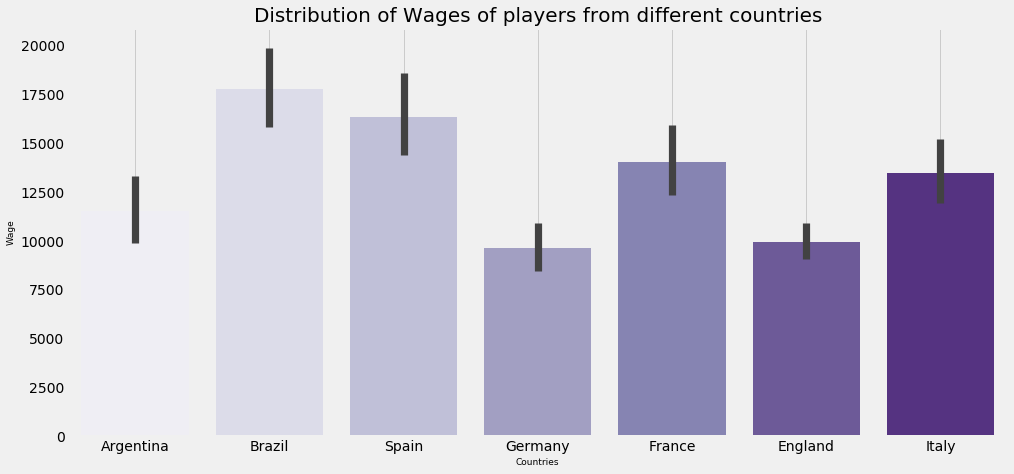

In [51]:
some_countries=('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia')
data_countries=data.loc[data['Nationality'].isin(some_countries)&data['Wage']]

plt.rcParams['figure.figsize']=(15,7)
ax=sns.barplot(x=data_countries['Nationality'], y=data_countries['Wage'], palette='Purples')
ax.set_xlabel(xlabel='Countries', fontsize=9)
ax.set_ylabel(ylabel='Wage',fontsize=9)
ax.set_title(label='Distribution of Wages of players from different countries', fontsize=20)
plt.grid()
plt.show()

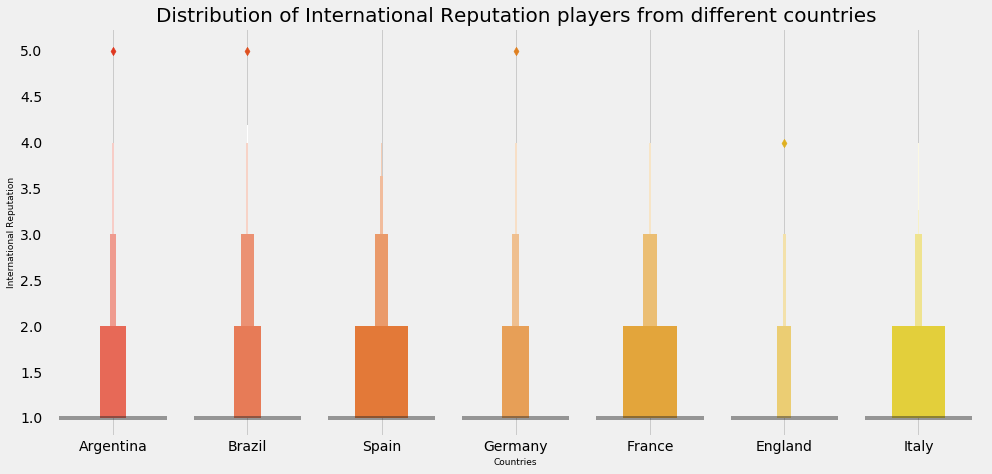

In [64]:
some_countries=('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia')
data_countries=data.loc[data['Nationality'].isin(some_countries)&data['International Reputation']]

plt.rcParams['figure.figsize']=(15,7)
ax=sns.boxenplot(x=data_countries['Nationality'], y=data_countries['International Reputation'], palette='autumn')
ax.set_xlabel(xlabel='Countries', fontsize=9)
ax.set_ylabel(ylabel='International Reputation',fontsize=9)
ax.set_title(label='Distribution of International Reputation players from different countries', fontsize=20)
plt.grid()
plt.show()

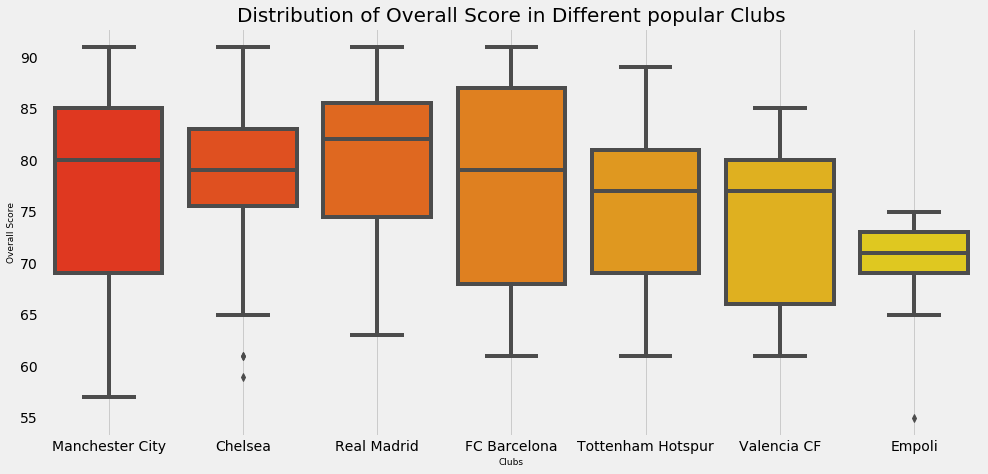

In [69]:
some_clubs=('Real Madrid','Southhampton','FC Barcelona','Chelsea','Manchester City','Empoli','Valencia CF','Tottenham Hotspur')
data_clubs=data.loc[data['Club'].isin(some_clubs)&data['Overall']]

plt.rcParams['figure.figsize']=(15,7)
ax=sns.boxplot(x=data_clubs['Club'], y=data_clubs['Overall'], palette='autumn')
ax.set_xlabel(xlabel='Clubs', fontsize=9)
ax.set_ylabel(ylabel='Overall Score',fontsize=9)
ax.set_title(label='Distribution of Overall Score in Different popular Clubs', fontsize=20)
plt.grid()
plt.show()

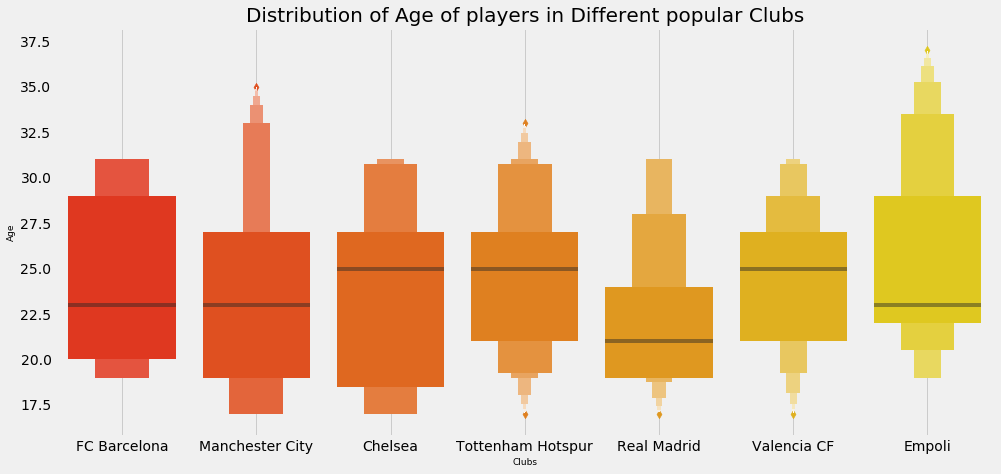

In [71]:
some_clubs=('Real Madrid','Southhampton','FC Barcelona','Chelsea','Manchester City','Empoli','Valencia CF','Tottenham Hotspur')
data_clubs=data.loc[data['Club'].isin(some_clubs)&data['Age']]

plt.rcParams['figure.figsize']=(15,7)
ax=sns.boxenplot(x=data_clubs['Club'], y=data_clubs['Age'], palette='autumn')
ax.set_xlabel(xlabel='Clubs', fontsize=9)
ax.set_ylabel(ylabel='Age',fontsize=9)
ax.set_title(label='Distribution of Age of players in Different popular Clubs', fontsize=20)
plt.grid()
plt.show()

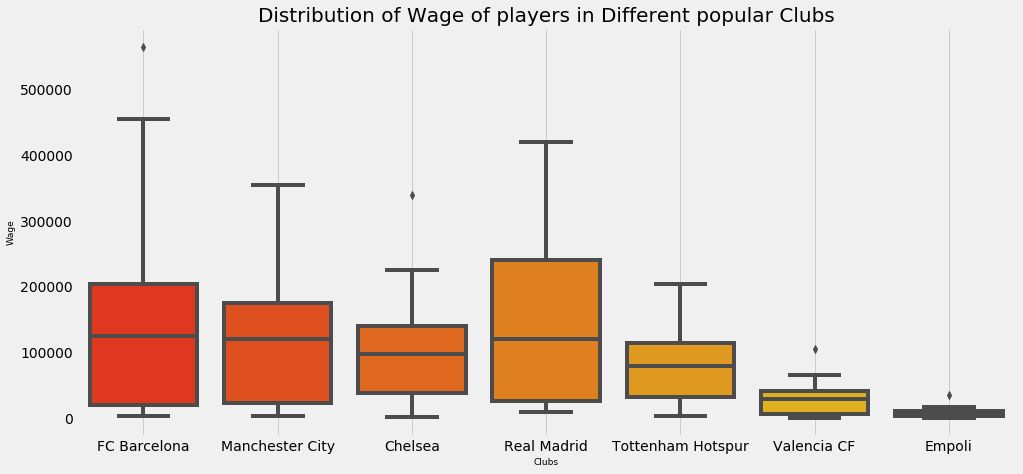

In [72]:
some_clubs=('Real Madrid','Southhampton','FC Barcelona','Chelsea','Manchester City','Empoli','Valencia CF','Tottenham Hotspur')
data_clubs=data.loc[data['Club'].isin(some_clubs)&data['Wage']]

plt.rcParams['figure.figsize']=(15,7)
ax=sns.boxplot(x=data_clubs['Club'], y=data_clubs['Wage'], palette='autumn')
ax.set_xlabel(xlabel='Clubs', fontsize=9)
ax.set_ylabel(ylabel='Wage',fontsize=9)
ax.set_title(label='Distribution of Wage of players in Different popular Clubs', fontsize=20)
plt.grid()
plt.show()

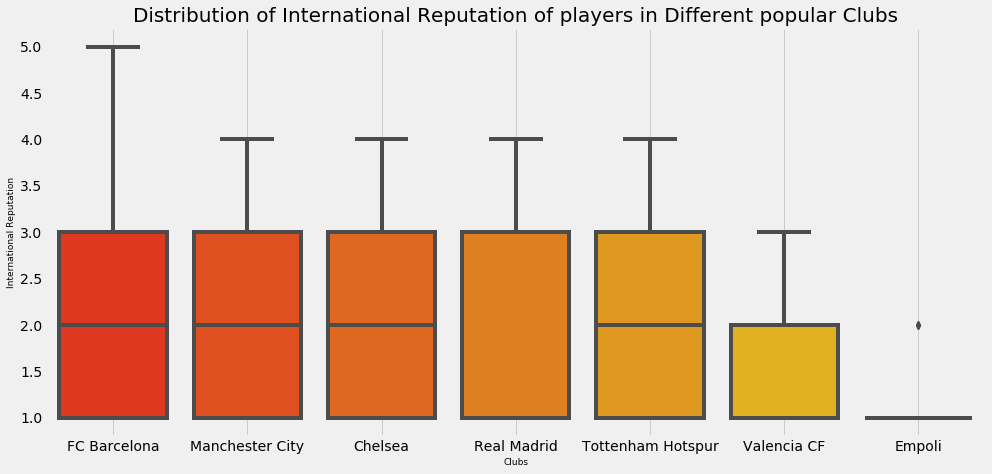

In [73]:
some_clubs=('Real Madrid','Southhampton','FC Barcelona','Chelsea','Manchester City','Empoli','Valencia CF','Tottenham Hotspur')
data_clubs=data.loc[data['Club'].isin(some_clubs)&data['International Reputation']]

plt.rcParams['figure.figsize']=(15,7)
ax=sns.boxplot(x=data_clubs['Club'], y=data_clubs['International Reputation'], palette='autumn')
ax.set_xlabel(xlabel='Clubs', fontsize=9)
ax.set_ylabel(ylabel='International Reputation',fontsize=9)
ax.set_title(label='Distribution of International Reputation of players in Different popular Clubs', fontsize=20)
plt.grid()
plt.show()

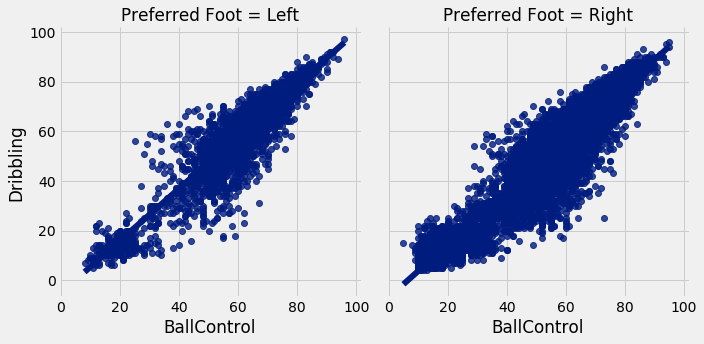

In [74]:
sns.lmplot(x='BallControl', y='Dribbling', data=data, col ='Preferred Foot')
plt.show()

In [89]:
data[data['Position']=='CAM'][['Name','Overall']]

,Name,Overall
17,A. Griezmann,89
31,C. Eriksen,88
61,Roberto Firmino,86
66,T. Müller,86
74,M. Özil,86
...,...,...
18121,B. Buckley,49
18138,Yin Congyao,49
18144,J. Garcia Sossa,49
18170,Nicolas Firmino,48


In [91]:
data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position','Name','Age','Club','Overall','Nationality']].sort_values(by='Overall', ascending=False).style.background_gradient(cmap='copper')

,Position,Name,Age,Club,Overall,Nationality
1,ST,Cristiano Ronaldo,33,Juventus,94,Portugal
0,RF,L. Messi,31,FC Barcelona,94,Argentina
2,LW,Neymar Jr,26,Paris Saint-Germain,92,Brazil
5,LF,E. Hazard,27,Chelsea,91,Belgium
7,RS,L. Suárez,31,FC Barcelona,91,Uruguay
4,RCM,K. De Bruyne,27,Manchester City,91,Belgium
3,GK,De Gea,27,Manchester United,91,Spain
8,RCB,Sergio Ramos,32,Real Madrid,91,Spain
12,CB,D. Godín,32,Atlético Madrid,90,Uruguay
11,LCM,T. Kroos,28,Real Madrid,90,Germany


In [92]:
@interact
def skills(skills=['Defending','General','Mental','Passing','Mobility','Power','Rating','Shooting'], score=75):
    return data[data[skills]>score][['Name','Nationality','Club','Overall',skills]].sort_values(by=skills,ascending=False).head(20).style.background_gradient(cmap='Blues')

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

In [106]:
@interact
def countries(countries=list(data['Nationality'].value_counts().index)):
    return data[data['Nationality']==countries][['Name','Nationality','Club','Overall']].sort_values(by='Overall',ascending=False).head(15).style.background_gradient(cmap='Blues')

interactive(children=(Dropdown(description='countries', options=('England', 'Germany', 'Spain', 'Argentina', '…

In [117]:
@interact
def clubs(clubs=list(data['Club'].value_counts().index)):
    return data[data['Club']==clubs][['Name','Nationality','Overall']].sort_values(by='Overall',ascending=False).head(15).style.background_gradient(cmap='bone')

interactive(children=(Dropdown(description='clubs', options=('AS Monaco', 'Southampton', 'Manchester City', 'N…

In [122]:
data[['Name','Age','Nationality']].sort_values(by='Age', ascending=True).head(15).style.background_gradient(cmap='pink')

,Name,Age,Nationality
18206,G. Nugent,16,England
17743,J. Olstad,16,Norway
13293,H. Massengo,16,France
16081,J. Italiano,16,Australia
18166,N. Ayéva,16,Sweden
17712,K. Broda,16,Poland
17354,L. D'Arrigo,16,Australia
13567,Y. Verschaeren,16,Belgium
16927,B. Nygren,16,Sweden
18018,B. O'Gorman,16,Republic of Ireland


In [123]:
data[['Name','Age','Nationality']].sort_values(by='Age', ascending=False).head(15).style.background_gradient(cmap='pink')

,Name,Age,Nationality
4741,O. Pérez,45,Mexico
18183,K. Pilkington,44,England
17726,T. Warner,44,Trinidad & Tobago
10545,S. Narazaki,42,Japan
7225,C. Muñoz,41,Argentina
1120,J. Villar,41,Paraguay
12192,H. Sulaimani,41,Saudi Arabia
15426,M. Tyler,41,England
4228,B. Nivet,41,France
10356,F. Kippe,40,Norway


In [130]:
data['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18207, dtype: object

In [159]:
now=datetime.datetime.now()
data['year_joined']=data['Joined'].map(lambda x: int(x.split(',')[1]))
data['years_of_memberss']=data['year_joined'].map(lambda x: now.year - x).astype('int')
@interact
def membership(clubs=sorted(list(data['Club'].value_counts().index))):
    return data[data['Club']==clubs][['Name','Nationality','Overall','years_of_memberss']].sort_values(by='years_of_memberss',ascending=False).head(15).style.background_gradient(cmap='bone')

interactive(children=(Dropdown(description='clubs', options=(' SSV Jahn Regensburg', '1. FC Heidenheim 1846', …

In [154]:
type(data['Overall'][0])

numpy.int64